In [38]:
import mne
import pandas as pd
import os
from scipy.signal import welch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = mne.io.read_raw_bdf('./sub001_med1breath.bdf')

Extracting EDF parameters from E:\Notes\IIIT-B\Dataset\sub001_med1breath.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


In [68]:
channel_names = raw_data.ch_names
print(channel_names)


['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']


Using matplotlib as 2D backend.


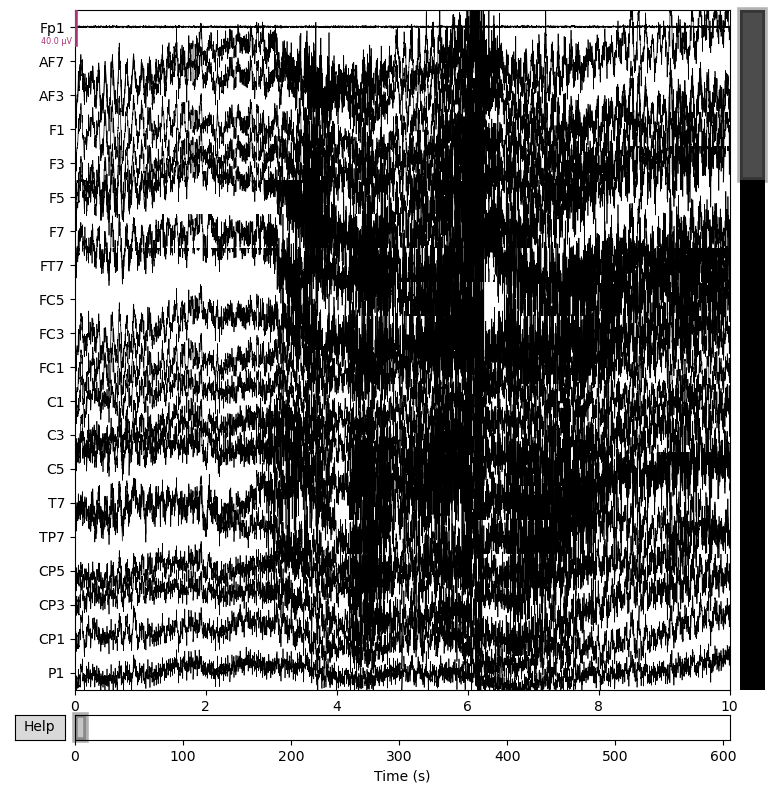

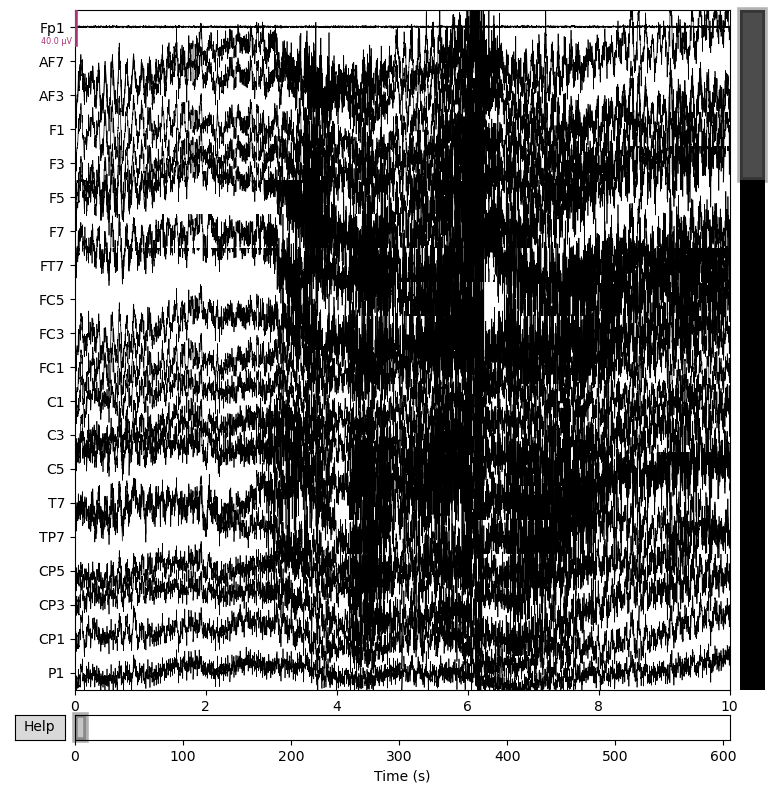

In [4]:
eeg_data = raw_data.get_data()
channel_names = raw_data.ch_names
time_index = raw_data.times
raw_data.plot()

In [5]:
df = pd.DataFrame(data=eeg_data.T, columns=channel_names, index=time_index)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 620544 entries, 0.0 to 605.9990234375
Data columns (total 80 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Fp1     620544 non-null  float64
 1   AF7     620544 non-null  float64
 2   AF3     620544 non-null  float64
 3   F1      620544 non-null  float64
 4   F3      620544 non-null  float64
 5   F5      620544 non-null  float64
 6   F7      620544 non-null  float64
 7   FT7     620544 non-null  float64
 8   FC5     620544 non-null  float64
 9   FC3     620544 non-null  float64
 10  FC1     620544 non-null  float64
 11  C1      620544 non-null  float64
 12  C3      620544 non-null  float64
 13  C5      620544 non-null  float64
 14  T7      620544 non-null  float64
 15  TP7     620544 non-null  float64
 16  CP5     620544 non-null  float64
 17  CP3     620544 non-null  float64
 18  CP1     620544 non-null  float64
 19  P1      620544 non-null  float64
 20  P3      620544 non-null  float64
 21

In [7]:
col_names = ['O1', 'O2', 'F3', 'F4', 'Fp1', 'Fp2']
df = df[col_names]

In [8]:
df

,O1,O2,F3,F4,Fp1,Fp2
0.000000,-0.008280,0.002899,-0.002482,0.002334,-0.259326,-0.000853
0.000977,-0.008280,0.002901,-0.002485,0.002334,-0.259326,-0.000854
0.001953,-0.008279,0.002904,-0.002488,0.002333,-0.259326,-0.000856
0.002930,-0.008281,0.002902,-0.002491,0.002329,-0.259326,-0.000859
0.003906,-0.008280,0.002901,-0.002492,0.002328,-0.259325,-0.000861
...,...,...,...,...,...,...
605.995117,-0.007095,0.004644,-0.003101,0.002527,-0.259319,-0.003098
605.996094,-0.007093,0.004648,-0.003099,0.002529,-0.259319,-0.003096
605.997070,-0.007092,0.004650,-0.003096,0.002531,-0.259319,-0.003094
605.998047,-0.007092,0.004649,-0.003096,0.002530,-0.259319,-0.003094


In [9]:
segment_size = 1024

In [10]:
num_segments = len(df) // segment_size
num_segments

606

In [11]:
reduced_df = pd.DataFrame(columns=df.columns)

In [12]:
%%capture

for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = (i + 1) * segment_size
    segment_data = df.iloc[start_idx:end_idx]    
    mean_values = segment_data.mean()    
    reduced_df = reduced_df.append(mean_values, ignore_index=True)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)



C:\Users\LENOVOi7\anaconda3\lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)


[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    1.3s finished
C:\Users\LENOVOi7\anaconda3\lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


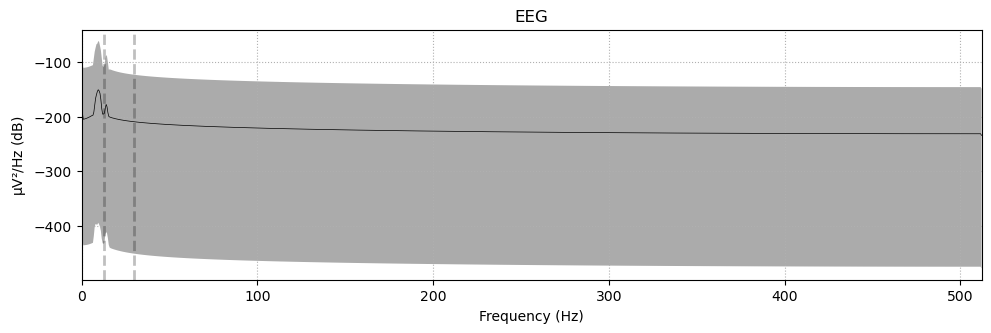

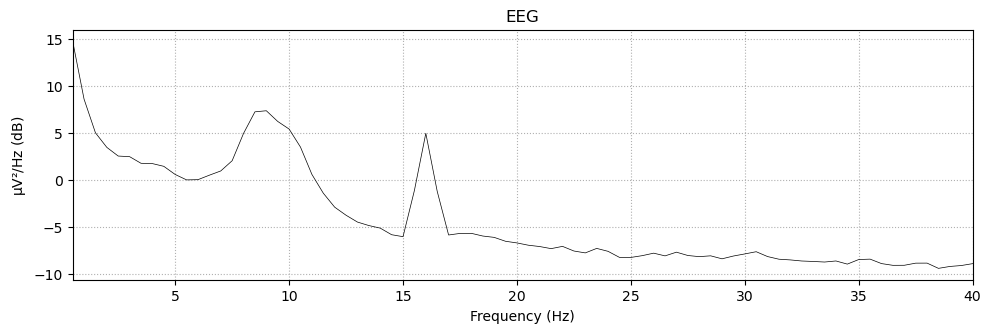

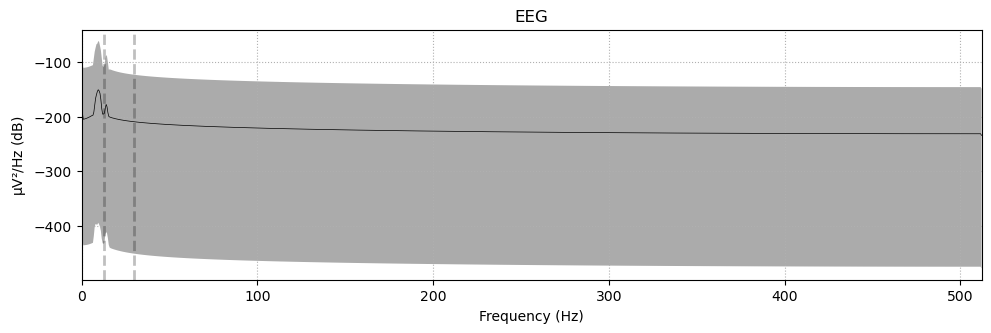

In [46]:
# psd_data = {}
# sampling_frequency = 256

channel_name = 'O1'

# Select the channel by name
eeg_channel = raw_data.copy().pick_channels([channel_name])

# Calculate and plot the PSD
eeg_channel.plot_psd(fmin=0.5, fmax=40, average=True, spatial_colors=False)

# Apply bandpass filters for alpha and gamma frequency ranges
alpha_decomp = []
gamma_decomp = []
eeg_channels.filter(l_freq=8, h_freq=13)  # Alpha (8-13 Hz)
# gamma_decomp = gamma_decomp.append(eeg_channels.filter(l_freq=30, h_freq=40))  # Gamma (30-40 Hz)
eeg_channels.plot_psd(area_mode='range', tmax=10.0, average=True)

In [70]:
# Define a list of channel names
channel_name_1 = ['O1', 'O2']
channel_name_2= ['F3', 'F4','C3' ,'C4' , 'Fp1', 'Fp2']  # Add more channel names as needed

# Create dictionaries to store the filtered data
eeg_dataframe = pd.DataFrame()


# Loop through each channel and filter data
for channel_name in channel_name_2:
    eeg_channel = raw_data.copy().pick_channels([channel_name])
    
    # Filter for Alpha (8-13 Hz)
    alpha_filtered = eeg_channel.filter(l_freq=8, h_freq=13)
    alpha_decomp = alpha_filtered.get_data()[0]
    eeg_dataframe[f'{channel_name} alpha'] = alpha_decomp
    
for channel_name in channel_name_1:
    eeg_channel = raw_data.copy().pick_channels([channel_name])
    
    # Filter for Gamma (30-40 Hz)
    gamma_filtered = eeg_channel.filter(l_freq=30, h_freq=40)
    gamma_decomp = gamma_filtered.get_data()[0]
    eeg_dataframe[f'{channel_name} gamma'] = gamma_decomp

# Now you have filtered EEG data for each channel in alpha_decomp and gamma_decomp dictionaries


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 451 samples (0.440 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Setting up band-pass filter from 30 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 451 samples (0.440 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [60]:
eeg_dataframe.head()

,O1 alpha,O2 alpha,F3 alpha,F4 alpha,O1 gamma,O2 gamma,F3 gamma,F4 gamma
0,1.285584e-18,-3.252607e-19,2.835443e-19,-2.905323e-19,-9.961107e-19,2.710505e-19,-2.943439e-19,3.345780e-19
1,2.037343e-07,3.565361e-07,-9.297064e-07,-8.486211e-07,7.557316e-07,9.552943e-07,1.171308e-06,9.269004e-07
2,4.070264e-07,7.113921e-07,-1.856871e-06,-1.695206e-06,1.472690e-06,1.855263e-06,2.274805e-06,1.794688e-06
3,6.096445e-07,1.063009e-06,-2.778824e-06,-2.537573e-06,2.114265e-06,2.646771e-06,3.246057e-06,2.547831e-06
4,8.111043e-07,1.409938e-06,-3.692839e-06,-3.373795e-06,2.647658e-06,3.283284e-06,4.028957e-06,3.138445e-06


In [1]:
%%capture
import os
import pandas as pd
import numpy as np
import mne
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define a function to extract labels from filenames
def extract_label_from_filename(filename):
    # Assuming filenames are in the format: subject_task.bdf
    task = filename.split('_')[1].split('.')[0]
    return task

# Function to convert .bdf file to DataFrame
def convert_bdf_to_dataframe(bdf_filename):
    raw_data = mne.io.read_raw_bdf(bdf_filename, preload=True)
    eeg_data1 = raw_data.get_data()
    channel_names = raw_data.ch_names
    time_index = raw_data.times
    eeg_data = pd.DataFrame(data=eeg_data1.T, columns=channel_names, index=time_index)
    col_names = ['O1', 'O2', 'F3', 'F4', 'C3' ,'C4' , 'Fp1', 'Fp2']
    eeg_data = eeg_data[col_names]
    segment_size = 1024
    num_segments = len(eeg_data) // segment_size
    reduced_df = reduced_df = pd.DataFrame(columns=eeg_data.columns)
    for i in range(num_segments):
        start_idx = i * segment_size
        end_idx = (i + 1) * segment_size
        segment_data = eeg_data.iloc[start_idx:end_idx]    
        mean_values = segment_data.mean()
        sampling_frequency = 1024  
        psd_data = {}  # Dictionary to store PSD results for each electrode
        reduced_df = reduced_df.append(mean_values, ignore_index=True)

    return reduced_df, raw_data

# Load and preprocess the data
data_dir = '../Dataset/'  # Replace with the path to your .bdf data directory

# Initialize empty lists to store data and labels
data = []
labels = []
raw_eegdata = []

# Loop through all files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('.bdf'):
        # Convert the .bdf file to a DataFrame
        eeg_data, eeg_raw = convert_bdf_to_dataframe(os.path.join(data_dir, filename))
        
        # Extract labels from filenames
        label = extract_label_from_filename(filename)
        
        # Append data and labels
        data.append(eeg_data)
        raw_eegdata.append(eeg_raw)
        labels.extend([label] * len(eeg_data))

# Concatenate all data and labels
data = pd.concat(data, axis=0, ignore_index=True)


In [2]:
channel_name_1 = ['O1', 'O2']
channel_name_2= ['F3', 'F4','C3' ,'C4' , 'Fp1', 'Fp2']  # Add more channel names as needed

# Create dictionaries to store the filtered data
eeg_dataframe = pd.DataFrame()


# Loop through each channel and filter data
for channel_name in channel_name_2:
    eeg_channel = eeg_raw.copy().pick_channels([channel_name])
    
    # Filter for Alpha (8-13 Hz)
    alpha_filtered = eeg_channel.filter(l_freq=8, h_freq=13)
    alpha_decomp = alpha_filtered.get_data()[0]
    eeg_dataframe[f'{channel_name} alpha'] = alpha_decomp
    
    # Filter for Beta (13-30 Hz)
    beta_filtered = eeg_channel.filter(l_freq=13, h_freq=30)
    beta_decomp = beta_filtered.get_data()[0]
    eeg_dataframe[f'{channel_name} beta'] = beta_decomp
    
for channel_name in channel_name_1:
    eeg_channel = eeg_raw.copy().pick_channels([channel_name])
    
    # Filter for Gamma (30-40 Hz)
    gamma_filtered = eeg_channel.filter(l_freq=30, h_freq=40)
    gamma_decomp = gamma_filtered.get_data()[0]
    eeg_dataframe[f'{channel_name} gamma'] = gamma_decomp

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1691 samples (1.651 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 451 samples (0.440 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 451 samples (0.440 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [6]:
%%capture
segment_size = 1024
num_segments = len(eeg_dataframe) // segment_size
reduced_decomp_df = pd.DataFrame(columns=eeg_dataframe.columns)
for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = (i + 1) * segment_size
    segment_data = eeg_dataframe.iloc[start_idx:end_idx]    
    mean_values = segment_data.mean()
    sampling_frequency = 1024  
    reduced_decomp_df = reduced_decomp_df.append(mean_values, ignore_index=True)

reduced_decomp_df.to_csv('alpha_beta_decomp.csv')

In [27]:
X = data
y = np.array(labels)


In [29]:
y

array(['med1breath', 'med1breath', 'med1breath', ..., 'think2', 'think2',
       'think2'], dtype='<U10')

In [13]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
# Create a Random Forest classifier (you can try other classifiers as well)
clf = RandomForestClassifier(random_state=0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  med1breath       1.00      0.99      1.00       139
   medNormal       1.00      1.00      1.00       236
   medbreath       1.00      1.00      1.00       117
      think1       1.00      1.00      1.00       240
      think2       1.00      1.00      1.00       243

    accuracy                           1.00       975
   macro avg       1.00      1.00      1.00       975
weighted avg       1.00      1.00      1.00       975



In [15]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[138   1   0   0   0]
 [  0 236   0   0   0]
 [  0   0 117   0   0]
 [  0   0   0 240   0]
 [  0   0   0   0 243]]


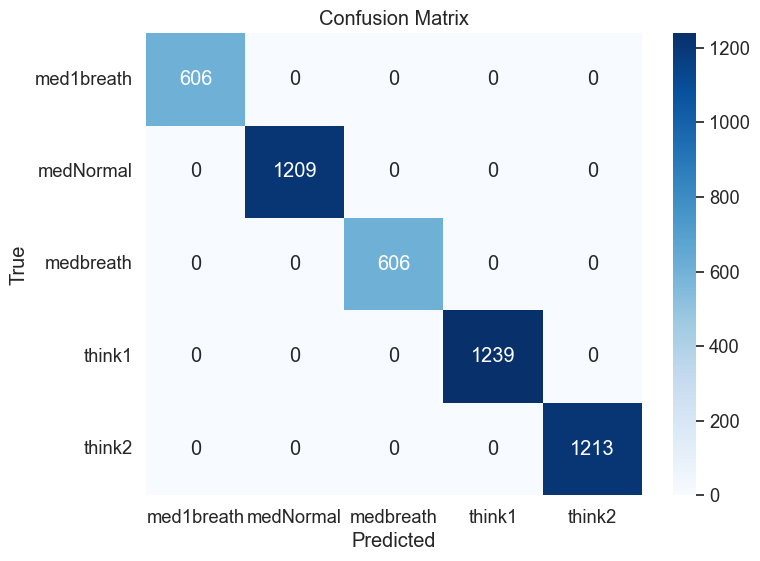

              precision    recall  f1-score   support

  med1breath       1.00      1.00      1.00       606
   medNormal       1.00      1.00      1.00      1209
   medbreath       1.00      1.00      1.00       606
      think1       1.00      1.00      1.00      1239
      think2       1.00      1.00      1.00      1213

    accuracy                           1.00      4873
   macro avg       1.00      1.00      1.00      4873
weighted avg       1.00      1.00      1.00      4873



In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Replace these with your actual predicted and true labels
predicted_labels = labels
true_labels = labels

# Get the unique class names from the labels
class_names = np.unique(true_labels)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels, labels=class_names)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# You can also print a classification report with precision, recall, and F1-score
print(classification_report(true_labels, predicted_labels, target_names=class_names))
